# sklearnの確認問題

## 必要モジュールのインポート

この問題で使うモジュールをインポートします。

In [1]:
import pandas as pd

## 前準備




### データの読み取り
scikit-learnから提供される`iris`というデータセットを読み込みます。

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

#説明変数の読み取り
data = iris.data
feature_names = iris.feature_names
df_data = pd.DataFrame(data=data, columns=feature_names)

#目的変数の読み取り
target = iris.target
target_names = iris.target_names
df_target = pd.DataFrame(data=target, columns=['target'])

### 問1. 説明変数の把握

1.1. `df_data` の先頭五行を表示してください。

In [3]:
print(df_data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


1.2. `df_data` の行数と列数を表示しましょう。

In [4]:
print(df_data.shape)

(150, 4)


1.3. `df_data` の各列の `mean`, `count`, `std` などの基本特徴量を表示しましょう。


In [5]:
print(df_data.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


1.4. `df_data` に欠損値がないかを確認しましょう。

In [6]:
print(df_data.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


### 問2. 目的変数の把握

2.1. `df_target` のうち、ランダムに 10 行表示しましょう。

目的変数の数字はそれぞれ、

- 0 が `setosa`（ヒオウギアヤメ）
- 1 が `versicolor`（ブルーフラッグ）
- 2 が `virginica`（バージニカ）

を指しています。


In [7]:
# ランダムに10行を選択
random_sample = df_target.sample(n=10, random_state=0) # random_stateは乱数の再現性のため設定
print(random_sample)

     target
114       2
62        1
33        0
107       2
7         0
100       2
40        0
86        1
76        1
71        1


### 問3. データの可視化（Extra）

3.1. x 軸を petal length (cm)、y 軸を petal width (cm)にして散布図を作成しましょう。 ただし、目的変数に応じて点の色と形を変更してください。

c:\Users\kupe20220413-1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kupe20220413-1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kupe20220413-1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kupe20220413-1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureW

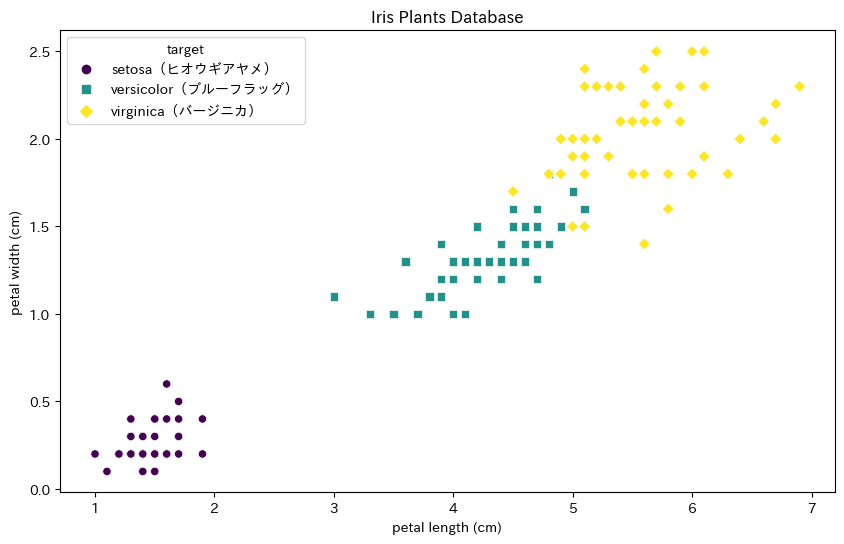

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
japanize_matplotlib.japanize()

# データとターゲットを一つのDataFrameに結合してプロットしやすくする
df_full = pd.concat([df_data, df_target], axis=1)

# 散布図を作成
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df_full,
    x='petal length (cm)',  # X軸には花弁の長さ
    y='petal width (cm)',   # Y軸には花弁の幅
    hue='target',           # 目的変数によって色分け
    style='target',         # 目的変数によって形を変える
    palette='viridis',      # 色のパレット
    markers={0:'o', 1:'s', 2:'D'}  # マーカーの形状
)

# タイトルとラベルの設定
plt.title('Iris Plants Database')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

# 凡例のラベルを日本語に設定
handles, labels = scatter.get_legend_handles_labels()
scatter.legend(
    handles, 
    ['setosa（ヒオウギアヤメ）', 'versicolor（ブルーフラッグ）', 'virginica（バージニカ）'],
    title='target'
)

# 散布図の表示
plt.show()


## 機械学習


### 問4. データの分割

4.1. iris データを 4:1 に分割して、80% を学習データとして 20% をテストデータとしてください。

ただし、分割した後の変数名は以下の通りにしてください。

| 変数名  |      内容      |
| :-----: | :------------: |
| x_train | 学習用の説明変数 |
| x_test | テスト用の説明変数 |
| y_train | 学習用の目的変数 |
| y_test | テスト用の目的変数 |

学習データでモデルの学習を行い、テストデータでモデルの評価を行います。


In [18]:
from sklearn.model_selection import train_test_split

# データを 4:1 の比率で分割する
x_train, x_test, y_train, y_test = train_test_split(
    df_data, df_target['target'], test_size=0.20, random_state=1
)

4.2. 本当に4:1に分割できているか確認しましょう。

In [20]:
# y_train と y_test を DataFrame に変換して、期待する形状を取得する
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

# 変換後の形状を表示
(x_train.shape, x_test.shape, y_train_df.shape, y_test_df.shape)

((120, 4), (30, 4), (120, 1), (30, 1))

### 問5. 学習

5.1. RandamForest の学習モデルのインスタンスを生成しましょう。

In [21]:
from sklearn.ensemble import RandomForestClassifier

# RandomForest の学習モデルのインスタンスを生成
rf_model = RandomForestClassifier(random_state=1)

5.2. `x_train` と `y_train` を用いて、モデルを学習させましょう。

In [22]:
# x_train と y_train を用いてモデルを学習させる
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

### 問6. 推論


6.1. 学習したモデルに `x_test` を入力して予測をしましょう。

In [23]:
from sklearn.metrics import accuracy_score

# 学習したモデルに x_test を入力して予測を行う
y_pred = rf_model.predict(x_test)

6.2. 予測結果と `y_test` に対して、`accuracy` を計算することでモデルを評価しましょう。

In [24]:
# 予測結果と y_test に対して正解率（accuracy）を計算してモデルを評価する
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9666666666666667

実は、iris データセットはかなり簡単な分布をしているので、正解率はほぼ 100% になったと思います。